In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

In [2]:
# Import
physics_df = pd.read_csv("gradcafe-admissions-data/physics.csv", names = ['Institution', 'Subject', 'Degree type and admission semester', 'Accept or reject', 'Method of communication', 'Date', 'GPA', 'GRE Verbal', 'GRE Quantitative', 'GRE Writing', 'GRE Subject', 'Student classification', 'Date posted', 'Comments'], encoding='latin1')

In [3]:
#Formatting
physics_df.columns = physics_df.columns.str.replace(' ', '_')

# Add American as a one-hot-encoded feature
physics_df['American'] = physics_df['Student_classification']
physics_df.American = physics_df.American.replace('A', 1).replace(['U', 'I', 'O'], 0)
physics_df = physics_df.dropna(subset=['American'])

# Add Papers as feature
physics_df['Papers'] = physics_df['Comments'].str.contains('(?<!no) [Pp]ub|(?<!no) [Pp]aper', regex=True)
physics_df.Papers = physics_df.Papers.replace(True, 1).replace(False, 0).fillna(value=0)

# Add RI as feature
physics_df['Research'] = physics_df['Comments'].str.contains('(?<!no) [Rr]esearch', regex=True)
physics_df.Research = physics_df.Research.replace(True, 1).replace(False, 0).fillna(value=0)

# Create categorical decision
physics_df['Decision'] = physics_df['Accept_or_reject']
physics_df.Decision = physics_df.Decision.replace('Accepted', 1).replace(['Rejected', 'Wait listed', 'Other', 'Interview'], 0)

# GPA column
physics_df.GPA = physics_df.GPA.replace(' ', np.NaN)
physics_df.GPA = physics_df.GPA.apply(lambda x: float(x))

# Drop NaNs
physics_df = physics_df.dropna(subset=['Accept_or_reject', 'GPA', 'GRE_Verbal', 'GRE_Quantitative', 'GRE_Writing', 'GRE_Subject']).reset_index(drop=True)

# Filters
physics_df = physics_df[physics_df['GPA'] <= 4] # Filter GPA
physics_df = physics_df[physics_df['GRE_Verbal'] <= 170] # Filter GRE Verbal
physics_df = physics_df[physics_df['GRE_Verbal'] >= 130]
physics_df = physics_df[physics_df['GRE_Quantitative'] <= 170] # Filter GRE Verbal
physics_df = physics_df[physics_df['GRE_Quantitative'] >= 130] 
physics_df = physics_df[physics_df['GRE_Writing'] <= 5] # Filter Writing
physics_df = physics_df[physics_df['GRE_Writing'] > 1] # Filter Writing
physics_df = physics_df[physics_df['GRE_Subject'] >= 400] # Filter GRE Subject

In [4]:
len(physics_df)

4934

In [5]:
year_list = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
count_array = physics_df[physics_df['Degree_type_and_admission_semester'] \
           .isin(['PhD (F19)', 'PhD (F18)', 'PhD (F17)',
                  'PhD (F16)', 'PhD (F15)', 'PhD (F14)',
                  'PhD (F13)', 'PhD (F12)'])] \
        ['Degree_type_and_admission_semester'] \
        .value_counts().sort_index(ascending=True).values

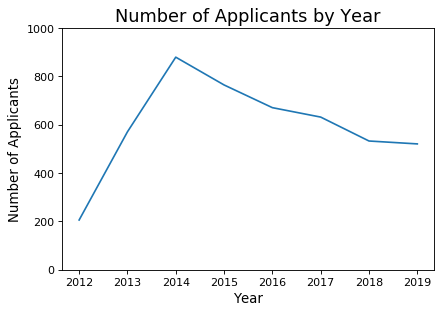

In [6]:
# Number of entries per year
plt.figure(dpi=80)
plt.plot(year_list, count_array)
plt.ylim(0, 1000)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.title('Number of Applicants by Year', fontsize=16)
plt.savefig('figures/number-of-applicants-by-year')

In [7]:
# Filter on year
physics_df = physics_df[physics_df['Degree_type_and_admission_semester'].isin(['PhD (F19)', 'PhD (F18)', 'PhD (F17)', 'PhD (F16)', 'PhD (F15)', 'PhD (F14)'])]

In [9]:
physics_df.to_csv('data/physics-df.csv') # Save point